# Triplet Extraction 

Text =  Born in small town, she took the midnight train going anywhere
Born -> advcl
in -> prep
small -> amod
town -> pobj
, -> punct
she -> nsubj
took -> ROOT
the -> det
midnight -> compound
train -> dobj
going -> xcomp
anywhere -> advmod
***********************
The triplet of the given sentence is:  she , small take , town train
***********************


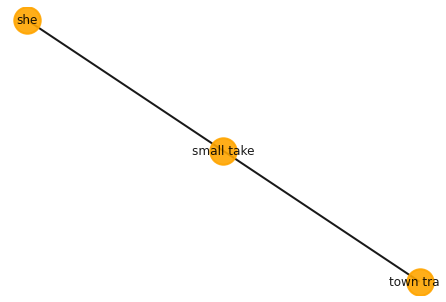

In [50]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

# This function is used to import text data and spliting the words

def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]

# Function used to print word and token Example: "Twenty -> nummod"

def printToken(token):
    print(token.text, "->", token.dep_)

def appendChunk(original, chunk):
    return original + ' ' + chunk

# Function to define all relation candidate which is used to define the given text input 

def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

# Function to define all construction candidate which is used to define the given text input 

def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

# This function will pass subject, object, relation, subject construction and object contruction and print triplets of the sentence

def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''

# Printing the triplets of the given sentence

    print("***********************")
    print ("The triplet of the given sentence is: ", subject.strip(), ",", relation.strip(), ",", object.strip())
    print("***********************")
    return (subject.strip(), relation.strip(), object.strip())
   

# Function used to return object pairs from the sentence by using NLP_model function

def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

# This function is used to plot node graph of triplets 

def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, edge_color='black', width=2, linewidths=2,
            node_size=700, node_color='orange', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

if __name__ == "__main__":

# This is sample input text

    #text = "Mold and germs can form very easily in those two rooms"
    text = "Born in small town, she took the midnight train going anywhere"

    sentences = getSentences(text)
    nlp_model = spacy.load('en_core_web_sm')

    triples = []
    print ("Text = ", text)
    # printing the relation and construction candidate
    for sentence in sentences:
        triples.append(processSentence(sentence))

# Ploting the nodes of triplets

    printGraph(triples)

# WordNet Tasks

In [19]:
import nltk
nltk.download('wordnet')

from nltk.corpus import wordnet as wn
# unambiguous word
wn.synsets('motorcar')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[Synset('car.n.01')]

In [51]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [43]:
# ambiguous word
wn.synsets('light')

[Synset('light.n.01'),
 Synset('light.n.02'),
 Synset('light.n.03'),
 Synset('luminosity.n.01'),
 Synset('light.n.05'),
 Synset('light.n.06'),
 Synset('light.n.07'),
 Synset('light.n.08'),
 Synset('light.n.09'),
 Synset('light.n.10'),
 Synset('sparkle.n.01'),
 Synset('light.n.12'),
 Synset('inner_light.n.01'),
 Synset('light.n.14'),
 Synset('lighter.n.02'),
 Synset('light.v.01'),
 Synset('light_up.v.05'),
 Synset('alight.v.01'),
 Synset('ignite.v.01'),
 Synset('fall.v.20'),
 Synset('unhorse.v.01'),
 Synset('light.a.01'),
 Synset('light.a.02'),
 Synset('light.a.03'),
 Synset('light.a.04'),
 Synset('light.a.05'),
 Synset('light.a.06'),
 Synset('unaccented.s.02'),
 Synset('light.s.08'),
 Synset('light.s.09'),
 Synset('clean.s.03'),
 Synset('light.s.11'),
 Synset('light.s.12'),
 Synset('light.a.13'),
 Synset('light.a.14'),
 Synset('faint.s.04'),
 Synset('light.s.16'),
 Synset('abstemious.s.02'),
 Synset('light.s.18'),
 Synset('light.s.19'),
 Synset('light.s.20'),
 Synset('idle.s.04'),
 Syn

In [44]:
for synset in wn.synsets('light'):
    print("\tLemma: {}".format(synset.name()))
    print("\tDefinition: {}".format(synset.definition()))
    print("\tExample: {}".format(synset.examples()))
    print()

	Lemma: light.n.01
	Definition: (physics) electromagnetic radiation that can produce a visual sensation
	Example: ['the light was filtered through a soft glass window']

	Lemma: light.n.02
	Definition: any device serving as a source of illumination
	Example: ['he stopped the car and turned off the lights']

	Lemma: light.n.03
	Definition: a particular perspective or aspect of a situation
	Example: ['although he saw it in a different light, he still did not understand']

	Lemma: luminosity.n.01
	Definition: the quality of being luminous; emitting or reflecting light
	Example: ['its luminosity is measured relative to that of our sun']

	Lemma: light.n.05
	Definition: an illuminated area
	Example: ['he stepped into the light']

	Lemma: light.n.06
	Definition: a condition of spiritual awareness; divine illumination
	Example: ["follow God's light"]

	Lemma: light.n.07
	Definition: the visual effect of illumination on objects or scenes as created in pictures
	Example: ['he could paint the li

In [45]:
for synset in wn.synsets('light'):
    print(synset.name(), ' -> ', synset.lemmas())

light.n.01  ->  [Lemma('light.n.01.light'), Lemma('light.n.01.visible_light'), Lemma('light.n.01.visible_radiation')]
light.n.02  ->  [Lemma('light.n.02.light'), Lemma('light.n.02.light_source')]
light.n.03  ->  [Lemma('light.n.03.light')]
luminosity.n.01  ->  [Lemma('luminosity.n.01.luminosity'), Lemma('luminosity.n.01.brightness'), Lemma('luminosity.n.01.brightness_level'), Lemma('luminosity.n.01.luminance'), Lemma('luminosity.n.01.luminousness'), Lemma('luminosity.n.01.light')]
light.n.05  ->  [Lemma('light.n.05.light')]
light.n.06  ->  [Lemma('light.n.06.light'), Lemma('light.n.06.illumination')]
light.n.07  ->  [Lemma('light.n.07.light'), Lemma('light.n.07.lightness')]
light.n.08  ->  [Lemma('light.n.08.light')]
light.n.09  ->  [Lemma('light.n.09.light'), Lemma('light.n.09.lighting')]
light.n.10  ->  [Lemma('light.n.10.light')]
sparkle.n.01  ->  [Lemma('sparkle.n.01.sparkle'), Lemma('sparkle.n.01.twinkle'), Lemma('sparkle.n.01.spark'), Lemma('sparkle.n.01.light')]
light.n.12  ->  

## Hyponym — a more specific concept


In [46]:
machine_that_prints = wn.synset('light.n.02')
sorted([lemma.name() for synset in machine_that_prints.hyponyms() for lemma in synset.lemmas()])

['anchor_light',
 'blinker',
 'fairy_light',
 'flasher',
 'flood',
 'flood_lamp',
 'floodlight',
 'headlamp',
 'headlight',
 'houselights',
 'jacklight',
 'navigation_light',
 'night-light',
 'panel_light',
 'photoflood',
 'riding_lamp',
 'riding_light',
 'room_light',
 'running_light',
 'sconce',
 'searchlight',
 'sidelight',
 'strip_lighting',
 'theater_light',
 'torch']

## Hypernym — a more general concept.


In [47]:
[lemma.name() for synset in  machine_that_prints.hypernyms() for lemma in synset.lemmas()]

['source_of_illumination']

In [48]:
machine_that_prints.root_hypernyms()

[Synset('entity.n.01')]

In [49]:
[synset.name() for synset in machine_that_prints.hypernym_paths()[0]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'device.n.01',
 'source_of_illumination.n.01',
 'light.n.02']

## Meronym — denotes a part of something


In [35]:
earth = wn.synset('earth.n.01')

# part_meronyms() - obtains parts

earth.part_meronyms()

[Synset('atmosphere.n.03'),
 Synset('hemisphere.n.01'),
 Synset('hydrosphere.n.01'),
 Synset('land.n.04'),
 Synset('lithosphere.n.01'),
 Synset('sky.n.01'),
 Synset('van_allen_belt.n.01')]

In [36]:
# substance_meronyms() - obtains substances
tree = wn.synset('tree.n.01')
tree.substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

## Holonym — denotes a membership to something

In [29]:
wn.synset('atom.n.01').part_holonyms()

[Synset('chemical_element.n.01'), Synset('molecule.n.01')]

In [25]:
wn.synset('oxygen.n.01').substance_holonyms()

[Synset('air.n.01'), Synset('ozone.n.01'), Synset('water.n.01')]

## Entailment — denotes how verbs are involved

In [24]:
wn.synset('breathe.v.01').entailments()

[Synset('exhale.v.01'), Synset('inhale.v.02')]